Client is asking for some changes in the data (Practice Exercises):

1) Transaction ID format must be: "###"
2) Date format must be: "YYYY-MM-DD"
3) Customer ID format must be: "C-###"
4) Add a "Total Amount" column, where it shows the total price paid for each transaction
5) Add a "Season" column
6) Predict the sales in the next year (using linear regression)

In [2]:
import pandas as pd
import numpy as np
import matplotlib as plot

# SHOW THE DATAFRAME

In [3]:
df = pd.read_csv('retail_sales_dataset.csv')
df.sample(10)

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit
144,145,11/2/2023,CUST145,Female,39,Clothing,3,25
506,507,11/2/2023,CUST507,Female,37,Electronics,3,500
890,891,4/5/2023,CUST891,Male,41,Electronics,3,300
918,919,9/9/2023,CUST919,Female,22,Beauty,2,25
659,660,4/29/2023,CUST660,Female,38,Beauty,2,500
95,96,12/19/2023,CUST096,Female,44,Clothing,2,300
458,459,3/21/2023,CUST459,Male,28,Clothing,4,300
651,652,5/1/2023,CUST652,Female,34,Beauty,2,50
630,631,11/10/2023,CUST631,Male,56,Electronics,3,30
459,460,5/2/2023,CUST460,Male,40,Beauty,1,50


In [4]:
df.shape

(1000, 8)

## CHECK FOR ANY DUPLICATE IN THE ID COLUMNS

In [5]:
df[df["Customer ID"].duplicated() ]

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit


In [6]:
df[df["Transaction ID"].duplicated() ]

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit


## CHECK FOR NULL VALUES

In [7]:
df.isnull().sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
dtype: int64

## CHECK IF THE DATE COLUMN IS CONSIDERED AS DATE TYPE

In [8]:
df["Date"].dtype

dtype('O')

In [9]:
df["Date"] = pd.to_datetime(df["Date"], format = "%m/%d/%Y")
df["Date"]

0     2023-11-24
1     2023-02-27
2     2023-01-13
3     2023-05-21
4     2023-05-06
         ...    
995   2023-05-16
996   2023-11-17
997   2023-10-29
998   2023-12-05
999   2023-04-12
Name: Date, Length: 1000, dtype: datetime64[ns]

# EXPLORATORY DATA ANALYSIS

In [10]:
df[["Age","Price per Unit"]].describe()

,Age,Price per Unit
count,1000.00000,1000.000000
mean,41.39200,179.890000
std,13.68143,189.681356
min,18.00000,25.000000
25%,29.00000,30.000000
50%,42.00000,50.000000
75%,53.00000,300.000000
max,64.00000,500.000000


<Axes: ylabel='Frequency'>

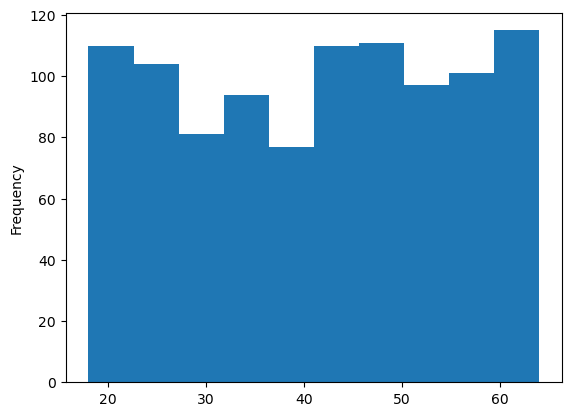

In [11]:
df["Age"].plot(kind="hist")

# DATA TRANSFORMATION

1) Transaction ID format must be: "###"

In [12]:
df["Transaction ID"] = df["Transaction ID"].astype(str).str.zfill(3)
df.sample(5)

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit
333,334,2023-11-01,CUST334,Male,31,Electronics,3,300
668,669,2023-06-19,CUST669,Male,24,Beauty,4,300
804,805,2023-12-29,CUST805,Female,30,Beauty,3,500
8,009,2023-12-13,CUST009,Male,63,Electronics,2,300
256,257,2023-02-19,CUST257,Male,19,Beauty,4,500


2) Date format must be: "YYYY-MM-DD"

In [13]:
df["Date"] = df["Date"].dt.strftime("%Y-%m-%d")
pd.to_datetime( df["Date"], format = "%Y-%m-%d")
df.sample(5)

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit
45,046,2023-06-26,CUST046,Female,20,Electronics,4,300
838,839,2023-06-24,CUST839,Female,20,Electronics,4,300
69,070,2023-02-21,CUST070,Female,43,Clothing,1,300
249,250,2023-10-23,CUST250,Male,48,Electronics,1,50
706,707,2023-10-01,CUST707,Female,26,Clothing,1,500


In [14]:
df["Date"] = pd.to_datetime( df["Date"], format = "%Y-%m-%d")
df["Date"].dtype

dtype('<M8[ns]')

3) Customer ID format must be: "C-###"

In [15]:
df["Customer ID"] = df["Customer ID"].str.replace("UST","-")
df.sample(5)

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit
272,273,2023-05-08,C-273,Female,22,Beauty,1,50
417,418,2023-08-05,C-418,Female,60,Electronics,2,500
825,826,2023-10-19,C-826,Female,46,Clothing,1,300
543,544,2023-12-23,C-544,Female,27,Electronics,1,25
339,340,2023-10-19,C-340,Female,36,Clothing,4,300


4) Add a "Total Amount" column, where it shows de total price paid for each transaction

In [16]:
df["Total Amount"] = df["Quantity"] * df["Price per Unit"]
df.sample(5)

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
497,498,2023-06-19,C-498,Female,50,Clothing,4,25,100
899,900,2023-02-21,C-900,Male,21,Clothing,2,30,60
157,158,2023-02-27,C-158,Female,44,Electronics,2,300,600
529,530,2023-02-05,C-530,Female,18,Electronics,4,30,120
136,137,2023-11-18,C-137,Male,46,Beauty,2,500,1000


5) Add a "Season" column

In [17]:
def season(date):
    month = date.month
    if month in [3,4,5]:
        return "Spring"
    elif month in [6,7,8]:
        return "Summer"
    elif month in [9,10,11]:
        return "Fall"
    else:
        return "Winter"

df["Season"] = df["Date"].apply(season)
df.sample(10)

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Season
405,406,2023-04-18,C-406,Female,22,Beauty,4,25,100,Spring
65,066,2023-04-27,C-066,Female,45,Electronics,1,30,30,Spring
82,083,2023-12-16,C-083,Male,54,Electronics,2,50,100,Winter
899,900,2023-02-21,C-900,Male,21,Clothing,2,30,60,Winter
894,895,2023-05-22,C-895,Female,55,Clothing,4,30,120,Spring
344,345,2023-11-14,C-345,Male,62,Electronics,1,30,30,Fall
445,446,2023-06-07,C-446,Male,21,Electronics,1,50,50,Summer
408,409,2023-12-18,C-409,Female,21,Electronics,3,300,900,Winter
152,153,2023-12-16,C-153,Male,63,Electronics,2,500,1000,Winter
404,405,2023-11-06,C-405,Female,25,Clothing,4,300,1200,Fall


# EXPORT DF TO A CSV FILE

In [18]:
df.to_csv('retail_sales_final.csv', index=False)

6. Predict the sales in the next year

statsmodels module will be used to predict the sales through Ordinary Least Squares. First a new df is created to have the data that will be used in the model (Monthly Sales vs Month):

In [39]:
model_df = pd.DataFrame()
model_df["Month"] = df["Date"].dt.month
model_df["Sales"] = df["Total Amount"]
model_df = model_df.groupby("Month", as_index=False).sum()
model_df

,Month,Sales
0,1,36980
1,2,44060
2,3,28990
3,4,33870
4,5,53150
5,6,36715
6,7,35465
7,8,36960
8,9,23620
9,10,46580


Applying statsmodels module:

In [61]:
import statsmodels.api as sm

x = model_df["Month"]
y = model_df["Sales"]


x = sm.add_constant(x)
lm = sm.OLS(y, x).fit()
lm.summary()


C:\Users\jisla\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  res = hypotest_fun_out(*samples, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.098
Method:                 Least Squares   F-statistic:                   0.01495
Date:                Wed, 25 Dec 2024   Prob (F-statistic):              0.905
Time:                        17:45:53   Log-Likelihood:                -124.39
No. Observations:                  12   AIC:                             252.8
Df Residuals:                      10   BIC:                             253.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.744e+04   5179.604      7.228      0.000    2.59e+04     4.9e+04
Month         86.0490    703.770      0.122      0.905   -1482.047    1654.145
==============================================================================
Omnibus:                        0.281   Durbin-Watson:                   2.657
Prob(Omnibus):                  0.869   Jarque-Bera (JB):                0.075
Skew:                           0.138   Prob(JB):                        0.963
Kurtosis:                       2.726   Cond. No.                         15.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

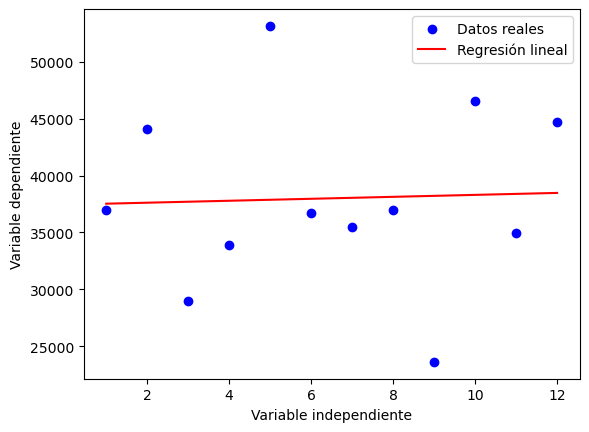

In [68]:
import matplotlib.pyplot as plt

plt.scatter(model_df["Month"], model_df["Sales"], color="blue", label="Datos reales")
plt.plot(model_df["Month"], lm.predict(x), color="red", label="Regresión lineal")
plt.xlabel("Variable independiente")
plt.ylabel("Variable dependiente")
plt.legend()
plt.show()

In [58]:
next_year_df =  pd.DataFrame()
next_year_df["Month"] = [13,14,15,16,17,18,19,20,21,22,23,24]
new_x = sm.add_constant(next_year_df["Month"])
next_year_df["Sales Prediction"] = lm.predict(new_x)
next_year_df

,Month,Sales Prediction
0,13,38559.318182
1,14,38645.367133
2,15,38731.416084
3,16,38817.465035
4,17,38903.513986
5,18,38989.562937
6,19,39075.611888
7,20,39161.660839
8,21,39247.709790
9,22,39333.758741


Conclusion for the prediction:
The sales across the months don't show a uniform tendecy. Nevertheless, the behaviour shows a linear tendency around 35K and 40K sales.
A low R-squared was obtained. This means the linear regression model doesn't show a strong relationship between the month and the sales. So these previous approximations should be taken as rough estimates rather than precise predictions.